In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# defining a function that will help us quickly calulate an average of a list
def avgOfList(list):
    return sum(list) / len(list)
# reading in the production spreadsheet
df = pd.read_csv(r'well production.csv')
# making list of well names
listOfWellNames = df['well name'].values
listOfFiles = []
# reading in spreadsheets of well data
for i in listOfWellNames:
    j = pd.read_csv((i + '.csv'))
    listOfFiles.append(j)
# creating easting and northing data to plot a map of the wells
easting = []
northing = []
for i in listOfFiles:
    easting.append(i.easting.values)
    northing.append(i.northing.values)


In [2]:
# creating lists of values from each file to color for better visualization
porosity = []
permeability = []
poissonRatio = []
youngMod = []
waterSat = []
oilSat = []
thickness = []
proppWt = []
pumpRt = []
for i in listOfFiles:
    porosity.append(i.porosity.values)
    permeability.append(i.permeability.values)
    poissonRatio.append(i["Poisson's ratio"].values)
    youngMod.append(i["Young's Modulus"].values)
    waterSat.append(i['water saturation'].values)
    oilSat.append(i['oil saturation'].values)
    thickness.append(i['thickness (ft)'].values)
    proppWt.append(i['proppant weight (lbs)'].values)
    pumpRt.append(i['pump rate (cubic feet/min)'].values)
avgNorth = []
avgEast = []
avgPor = []
avgPerm = []
avgPR = []
avgYM = []
avgWS = []
avgOS = []
avgThk = []
avgPRPWT = []
avgPMPRT = []
for well in northing:
    avgNorth.append(avgOfList(well))
df['average northing'] = avgNorth
for well in easting:
    avgEast.append(avgOfList(well))
df['average easting'] = avgEast
for well in porosity:
    avgPor.append(avgOfList(well))
df['average porosity'] = avgPor
for well in permeability:
    avgPerm.append(avgOfList(well))
df['average permeability'] = avgPerm
for well in poissonRatio:
    avgPR.append(avgOfList(well))
df['average poissons ratio'] = avgPR
for well in youngMod:
    avgYM.append(avgOfList(well))
df['average youngs modulus'] = avgYM
for well in waterSat:
    avgWS.append(avgOfList(well))
df['average water saturation'] = avgWS
for well in oilSat:
    avgOS.append(avgOfList(well))
df['average oil saturation'] = avgOS
for well in thickness:
    avgThk.append(avgOfList(well))
df['average thickness'] = avgThk
for well in proppWt:
    avgPRPWT.append(avgOfList(well))
df['average proppant weight'] = avgPRPWT
for well in pumpRt:
    avgPMPRT.append(avgOfList(well))
df['average pump rate'] = avgPMPRT

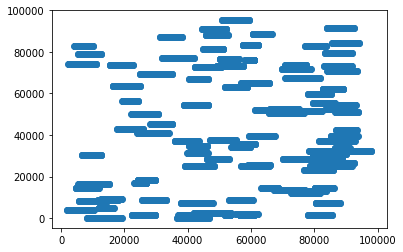

In [3]:
# map of wells
plt.scatter(easting, northing)

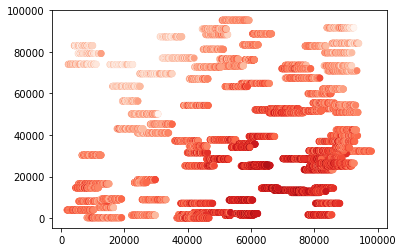

In [4]:
# map of wells colored by porosity
# high porosity at (70, 10)
plt.scatter(easting, northing, c = porosity,cmap="Reds")

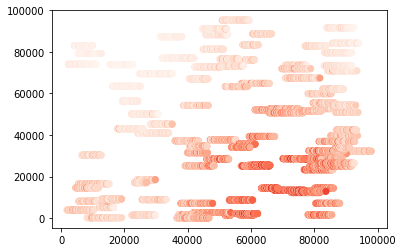

In [5]:
# map of wells colored by permeability
# looks uniform
plt.scatter(easting, northing, c = permeability, cmap = "Reds")

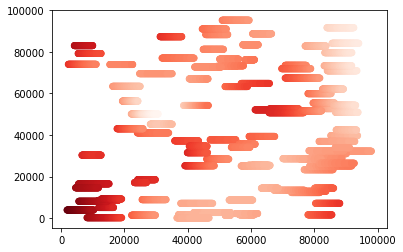

In [6]:
# map of wells colored by PR
plt.scatter(easting, northing, c = poissonRatio, cmap = "Reds")

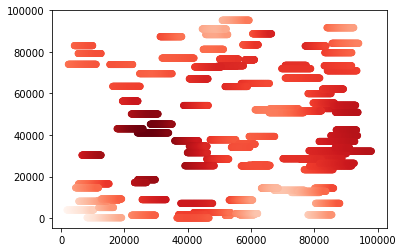

In [7]:
# map of wells colored by YM
plt.scatter(easting, northing, c = youngMod, cmap = "Reds")

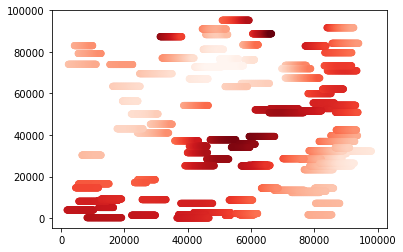

In [8]:
# map of wells colored by water saturation
plt.scatter(easting, northing, c = waterSat, cmap = "Reds")

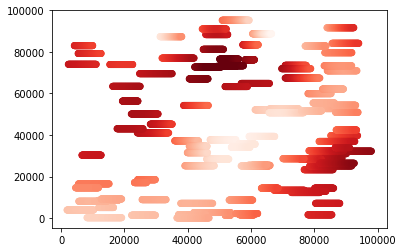

In [9]:
# map of wells colored by oil saturation
# hotspot for oil at (90, 30) and (50,70)
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")

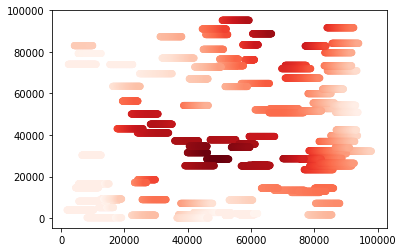

In [10]:
# map of wells colored by thickness
# thicker toward center of reservoir
plt.scatter(easting, northing, c = thickness, cmap = "Reds")

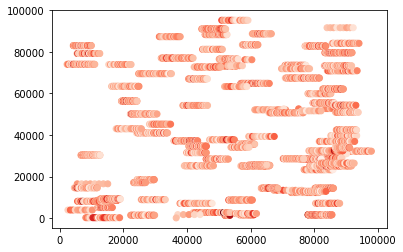

In [11]:
# map of wells colored by proppant rate
# looks uniform
plt.scatter(easting, northing, c = proppWt, cmap = "Reds")

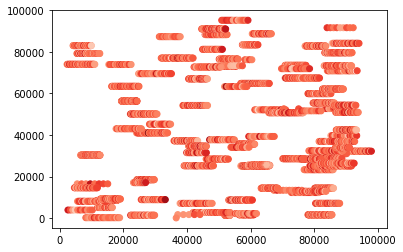

In [12]:
# map of wells colored by pump rate
# looks uniform
plt.scatter(easting, northing, c = pumpRt, cmap = "Reds")

In [13]:
# calculating original oil in place
porAvgs = avgOfList(porosity)
oilSatAvgs = avgOfList(oilSat)
AREA = (2 * 59239.73 * 42618) / 43560
avgThickness = avgOfList(avgOfList(thickness))
factor = (AREA * avgThickness * 7758) / 1.6
OOIP = []
for poravg in porAvgs:
    for oilsatavg in oilSatAvgs:
        ooip = poravg * oilsatavg * factor
    OOIP.append(ooip)

In [14]:
#calculating average recoverable reserves for each well
i = 0
RR = []
while i < 100:
    rr = OOIP[i] * df['recovery factor'][i]
    RR.append(rr)
    i += 1

In [15]:
# average overall recoverable reserves
100 * avgOfList(RR)

12680320877.641693

In [16]:
avgOfList(porAvgs) * avgOfList(oilSatAvgs) * factor * avgOfList(df['recovery factor'].values)

126563416.6603315

In [17]:
avgOfList(porAvgs) * avgOfList(oilSatAvgs) * factor

1333635989.928023

In [18]:
diffInOOIPandRR = 1333635989.928023 - 126563416.6603315
diffInOOIPandRR

1207072573.2676916

In [19]:
RRave = avgOfList(df['recovery factor'].values)
RRave

0.09490102068043484

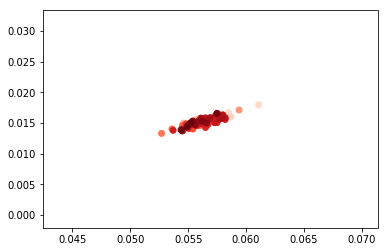

In [20]:
plt.scatter(avgOfList(porosity), avgOfList(permeability), c = avgOfList(easting), cmap = "Reds")

In [21]:
i = 0
names = []
east = []
north = []
while i < len(df['well name'].values):
    if (df.iloc[i]['average porosity'] > 0.071175) and (df.iloc[i]['average oil saturation'] > 0.925384) and (df.iloc[i]['average permeability'] > 0.021980):
        names.append(df.iloc[i][0])
        north.append(df.iloc[i]['average northing'])
        east.append(df.iloc[i]['average easting'])
        print("name:", df.iloc[i][0], "northing:", df.iloc[i]['average northing'], "easting:", df.iloc[i]['average easting'])
        print("porosity: ", df.iloc[i]['average porosity'], "Oil Saturation ", df.iloc[i]['average oil saturation'], "permeability: ", df.iloc[i]['average permeability'])
    i += 1
for name in names:
    index = list(df['well name'].values).index(name)
    print(df.iloc[index]['oil 1'], df.iloc[index]['oil 2'], df.iloc[index]['oil 3'], df.iloc[index]['oil 4'], df.iloc[index]['oil 5'])

name: Federal 14-113H northing: 31000.0 easting: 84831.86
porosity:  0.07169999999999999 Oil Saturation  0.9289393062759095 permeability:  0.022609999999999984
name: State 3-95H northing: 23300.0 easting: 81373.8
porosity:  0.07929999999999998 Oil Saturation  0.9307890564785322 permeability:  0.02796999999999998
name: State 3-156H northing: 25100.0 easting: 85172.17
porosity:  0.07459999999999999 Oil Saturation  0.9482775221470735 permeability:  0.024169999999999983
name: Brisket 10-65H northing: 14400.0 easting: 83103.15
porosity:  0.08059999999999996 Oil Saturation  0.9341401570264074 permeability:  0.02810999999999997
name: Pole 14-200H northing: 26400.0 easting: 87171.71
porosity:  0.07289999999999996 Oil Saturation  0.9579469314415757 permeability:  0.023179999999999992
name: Tribal 14-4H northing: 12900.0 easting: 79389.72
porosity:  0.0814 Oil Saturation  0.9257950236446446 permeability:  0.029659999999999978
256.0 242.0 267.0 263.0 199.0
320.0 321.0 310.0 281.0 269.0
419.0 407.

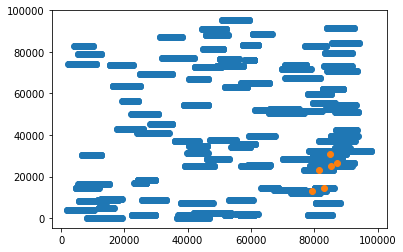

In [22]:
plt.scatter(easting, northing)
plt.scatter(east, north, cmap = "Reds")

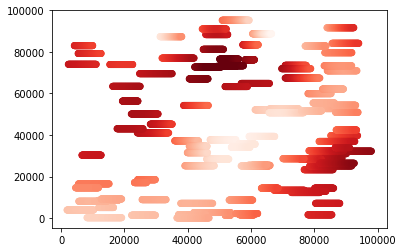

In [23]:
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")